In [247]:
import tensorflow as tf
import numpy as np
from pandas.io.parsers import read_csv

In [248]:
data = read_csv('price data.csv', sep=',')

In [249]:
xy = np.array(data, dtype=np.float32)

In [250]:
x_data = np.array(xy[:,2])

In [251]:
y_data = np.array(xy[:, -1])

In [252]:
W = tf.Variable(tf.random.normal([1]), name = "weight")
b = tf.Variable(tf.random.normal([1]), name = "bias")

In [253]:
x_data

array([-11. ,  -5.5,  -6.9, ...,  -2.1,  -1.6,  -2. ], dtype=float32)

In [254]:
y_data

array([2123., 2123., 2123., ..., 2901., 2901., 2901.], dtype=float32)

In [255]:
W

<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([-0.16754764], dtype=float32)>

In [256]:
b

<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-0.3140856], dtype=float32)>

In [257]:
n_samples = 2922

In [258]:
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

In [259]:
linear_regression(3)

<tf.Tensor: id=1533505, shape=(1,), dtype=float32, numpy=array([-0.81672853], dtype=float32)>

In [260]:
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2*n_samples)

In [261]:
optimizer = tf.optimizers.SGD(0.005)

In [262]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(x_data)
        loss = mean_square(pred, y_data)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [263]:
# Run training for the given number of steps.
for step in range(1, 10000 + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % 500 == 0:
        pred = linear_regression(x_data)
        loss = mean_square(pred, y_data)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 500, loss: 1056878.750000, W: 53.516075, b: 2419.991699
step: 1000, loss: 921945.687500, W: 27.904434, b: 2953.834229
step: 1500, loss: 915336.875000, W: 22.236286, b: 3071.979980
step: 2000, loss: 915012.937500, W: 20.981758, b: 3098.128906
step: 2500, loss: 914997.187500, W: 20.704168, b: 3103.914795
step: 3000, loss: 914996.500000, W: 20.642675, b: 3105.196533
step: 3500, loss: 914996.312500, W: 20.629421, b: 3105.472900
step: 4000, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 4500, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 5000, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 5500, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 6000, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 6500, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 7000, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 7500, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 8000, loss: 914996.500000, W: 20.627190, b: 3105.519287
step: 85

In [264]:
import matplotlib.pyplot as plt

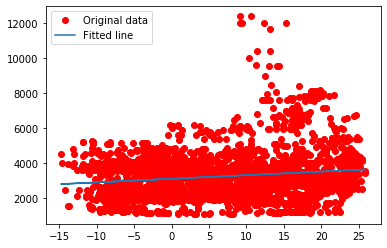

In [265]:
# Graphic display
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, np.array(W * x_data + b), label='Fitted line')
plt.legend()
plt.show()